In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

%matplotlib inline

#função que descreve a trajetória
def Y(x):
    y=1-0.5*x+0.5*cos(x/2)-0.3*x*sin(5*x)
    return y
#primeira derivada
def dYdX(x, dx):
    taxaVar=(Y(x+dx)-Y(x))/dx
    return taxaVar
#derivada segunda
def d2YdX2(x, dx):
    taxaVar=(dYdX(x+dx, dx)-dYdX(x, dx))/dx
    return taxaVar



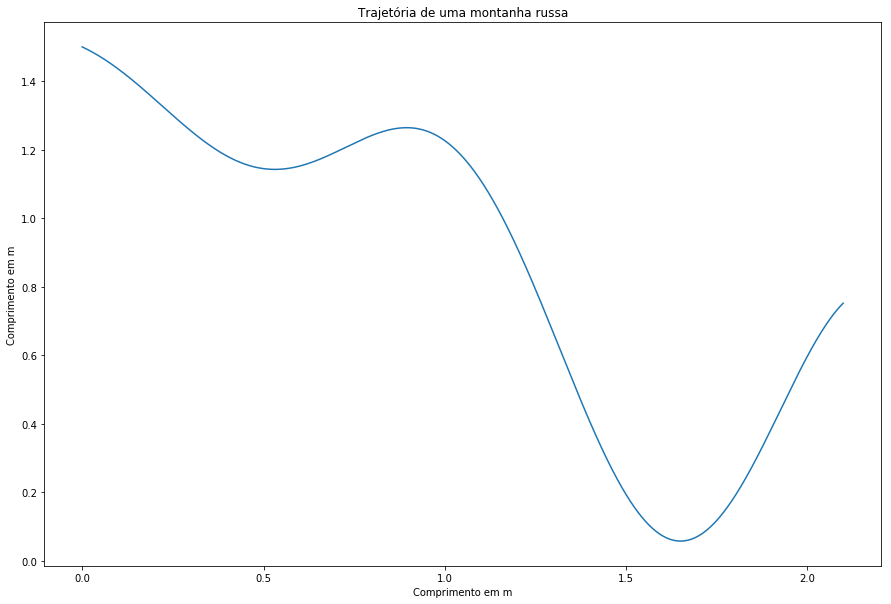

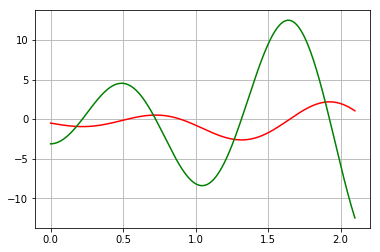

In [2]:


#define dx para desenhar a trajetória
dx=0.001
listaX=np.arange(0, 2.1, dx)
listaY=[]
for x in listaX:
    listaY.append(Y(x))
#plota a trajetória
plt.figure(figsize=(15,10))
plt.plot(listaX,listaY)
plt.title('Trajetória de uma montanha russa')
plt.xlabel('Comprimento em m')
plt.ylabel('Comprimento em m')
#plt.grid(True)
plt.show()

#vamos plotar a primeira e segunda derivadas
listadYdX=[]
listadY2dX2=[]
for x in listaX:
    listadYdX.append(dYdX(x, dx))
    listadY2dX2.append(d2YdX2(x, dx))
    
plt.plot(listaX,listadYdX, 'r')
plt.plot(listaX,listadY2dX2, 'g')
plt.grid(True)
plt.show()
    

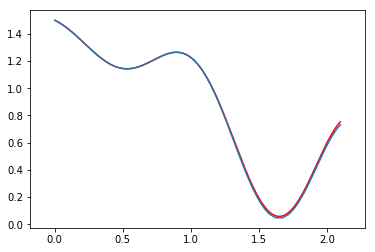

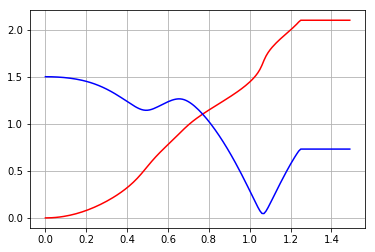

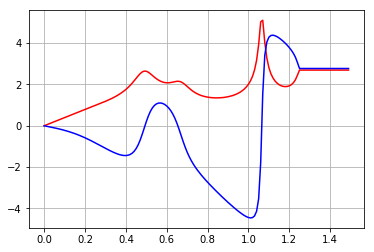

Velocidade Máxima: 5.33 m/s
Velocidade Máxima: 19.19 km/h


In [3]:


from scipy.integrate import odeint
g=9.8
m=0.5

def Sistema(S, t):
    X =S[0]
    Vx=S[1]
    Y =S[2]
    Vy=S[3]
    dXdt=Vx
    dYdt=Vy
    #módulo da velocidade
    V=sqrt(Vx**2+Vy**2)
    #raio de curvatura da trajetória em função de X
    pho=((1+dYdX(X,dx)**2)**(3/2))/(d2YdX2(X,dx))  
    #Teta é o ângulo entre a tangente da trajetória e o eixo x
    teta=atan(dYdX(X,dx))
    #resultante centrípeta
    Rcentripeta = (m*V**2)/pho
    #normal
    N=m*g*cos(teta)+Rcentripeta     
    #acelerações em x e em y    
    dVxdt=-(N*sin(teta))/m
    dVydt=-g + (N*cos(teta))/m  
    
    if (X>2.1):
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
       
    return[dXdt, dVxdt, dYdt, dVydt]
dt=0.01
listaTempo = np.arange(0,1.5, dt)
cond_inicial = [0, 0, Y(0), 0]

solucao = odeint(Sistema, cond_inicial, listaTempo)
plt.plot(listaX, listaY, 'r')
plt.plot(solucao[:,0], solucao[:,2])

#vetor posição

#plt.arrow(0,0, 15, Y(15), fc="k", ec="k", width=0.001, head_width=0.2, head_length=0.2)

plt.axis('equal')

plt.show()

plt.plot(listaTempo, solucao[:,0], 'r')
plt.plot(listaTempo, solucao[:,2], 'b')
plt.grid(True)
plt.show()

plt.plot(listaTempo, solucao[:,1], 'r')
plt.plot(listaTempo, solucao[:,3], 'b')
plt.grid(True)
plt.show()

velocidade=[]
for i in range(0, len(solucao[:,1])):
    velocidade.append(sqrt((solucao[:,1][i])**2 + (solucao[:,3][i])**2))

print('Velocidade Máxima: %.2f m/s' % (max(velocidade)))
print('Velocidade Máxima: %.2f km/h' % (max(velocidade)*3.6))


    

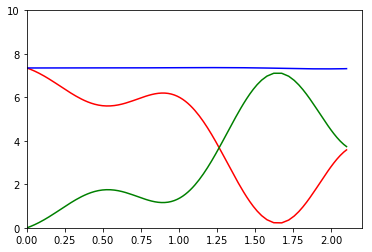

In [4]:


#validação
xt=solucao[:,0]
yt=solucao[:,2]
Vxt=solucao[0:,1]
Vyt=solucao[0:,3]

#energia potencial e cinética
listaP=[]
listaC=[]
listaM=[]

for i in range(0, len(xt)):
    Ep=m*g*yt[i]
    Ec=m*(Vxt[i]**2+Vyt[i]**2)/2
    listaP.append(Ep)
    listaC.append(Ec)
    listaM.append(Ec+Ep)
    
plt.plot(xt, listaP, 'r')
plt.plot(xt, listaC, 'g')
plt.plot(xt, listaM, 'b')
plt.axis([0,2.2,0,10])
plt.show()
    
    


In [5]:
def CoordenadasSeta(x1, y1, x2, y2, prop, seta):    
    #calcula comprimento do vetor    
    comp=sqrt((x2-x1)**2+(y2-y1)**2)    
    xl=x1+prop*(x2-x1)
    yl=y1+prop*(y2-y1) 
    deltaX=x2-x1
    if deltaX < 0.001:
        deltaX = 0.001
    teta=atan((y2-y1)/(deltaX))
    x3=xl-comp*seta*sin(teta)
    y3=yl+comp*seta*cos(teta)
    x4=xl+comp*seta*sin(teta)
    y4=yl-comp*seta*cos(teta)   
    return x3, y3, x4, y4
    

In [10]:
import matplotlib.patches as patches
from matplotlib import animation

%matplotlib qt

#obtém as soluções do ODEINT
xt=solucao[:,0]
yt=solucao[:,2]

vxt=solucao[:,1]
vyt=solucao[:,3]

ayt=[0]
axt=[0]
for i in range(1, len(vxt)):
    axt.append((vxt[i]-vxt[i-1])/dt)
    ayt.append((vyt[i]-vyt[i-1])/dt)
    

#determina o tamanho da figura e iguala as escalas x e y
fig = plt.figure(figsize=(20,20), facecolor='gray')
plt.axis('equal')

ax = fig.add_subplot(111)
#dimensão dos eixos
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.plot(listaX, listaY, 'b--')
ax.grid(True)
#ax.set_axis_bgcolor('black') 
#especificando as posições iniciais, tamanho e cor das figuras

Bola = patches.Circle((0, 0), 0.02, fc='blue')
Veloc_text = ax.text(0.2, 2, 'Velocidade', size=20, color='blue')


def init():
    #inclui as figuras que serão desenhadas    
    ax.add_patch(Bola)    
    Veloc_text.set_text('Velocidade')
    
    return Bola, Veloc_text

def animate(i):
    #animação da bolinha    
    Bola.center=(xt[i], yt[i])          
    #texto para a velocidade
    Veloc_text.set_text('Velocidade = %.1f m/s' % (sqrt(vyt[i]**2+vxt[i]**2)))    
    
    return Bola, Veloc_text

anim = animation.FuncAnimation(fig, animate, np.arange(0, len(yt)), interval=70, blit=True, init_func=init)
plt.show()

ModuleNotFoundError: No module named 'PyQt4'